In [1]:
import pandas as pd

# 윈도우 경로 표기 시 백슬래시 대신 슬래시 또는 r'' 사용
file_path = r"C:\Users\User\Downloads\data.csv"
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())


     문서고유id                                             제목     부서명  \
0  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   
1  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   
2  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   
3  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   
4  29646743  2023년 10월 서울시본청 문화본부 문화재정책과 업무추진비 - 시책추진 부서운영  문화재정책과   

           전화번호  작성자         등록일  해당년도  해당월  \
0  02-2133-2614  양진혁  2023-11-09  2023   10   
1  02-2133-2614  양진혁  2023-11-09  2023   10   
2  02-2133-2614  양진혁  2023-11-09  2023   10   
3  02-2133-2614  양진혁  2023-11-09  2023   10   
4  02-2133-2614  양진혁  2023-11-09  2023   10   

                                          문서url 구분(시장실만 사용)  ...  \
0  https://opengov.seoul.go.kr/expense/29646743         NaN  ...   
1  https://opengov.seoul.go.kr/expense/29646743         NaN  ...   
2  https://opengov.seoul.go.kr/expense/29646743         NaN  ...   
3  https://opengov.seoul

C:\Users\User\AppData\Local\Temp\ipykernel_27200\1791560317.py:54: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_27200\1791560317.py:54: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_27200\1791560317.py:54: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_27200\1791560317.py:54: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_27200\1791560317.py:54: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_27200\1791560317.py:54: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) Arial.
  plt.tight_layout

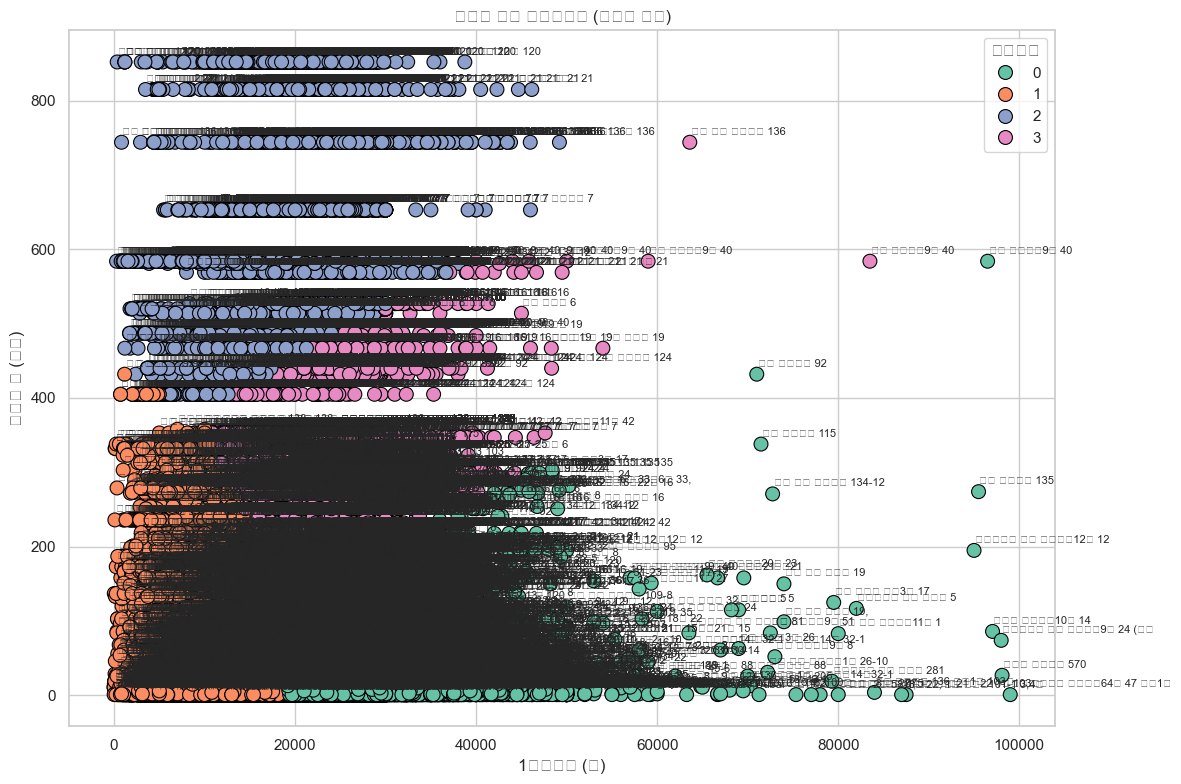

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 파일 불러오기
file_path = r"C:\Users\User\Downloads\data.csv"
df = pd.read_csv(file_path)

# 2. 필요한 컬럼만 추출하고 결측치 제거
data = df[['주소지', '1인당비용', '중복']].dropna()

# 3. 이상치 제거 (1인당비용 10만원 이하, 중복 1000 이하만 사용)
filtered_data = data[(data['1인당비용'] < 100000) & (data['중복'] < 1000)].copy()

# 4. 정규화
scaler = StandardScaler()
scaled = scaler.fit_transform(filtered_data[['1인당비용', '중복']])

# 5. KMeans 클러스터링
kmeans = KMeans(n_clusters=4, random_state=0)
filtered_data['클러스터'] = kmeans.fit_predict(scaled)

# 6. 시각화
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# 산점도
sns.scatterplot(
    data=filtered_data,
    x='1인당비용',
    y='중복',
    hue='클러스터',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# 텍스트 라벨 추가 (장소명)
for _, row in filtered_data.iterrows():
    plt.text(
        row['1인당비용'] + 100,  # X축 살짝 오른쪽으로
        row['중복'] + 10,        # Y축 살짝 위로
        row['주소지'],
        fontsize=8
    )

plt.title("공무원 맛집 클러스터링 (주소지 표시)")
plt.xlabel("1인당비용 (원)")
plt.ylabel("재방문 수 (중복)")
plt.legend(title="클러스터")
plt.grid(True)
plt.tight_layout()
plt.show()
